In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("StepFit.csv", header=None).T
data.columns = ["input", "output"]
data.index.name = "index"

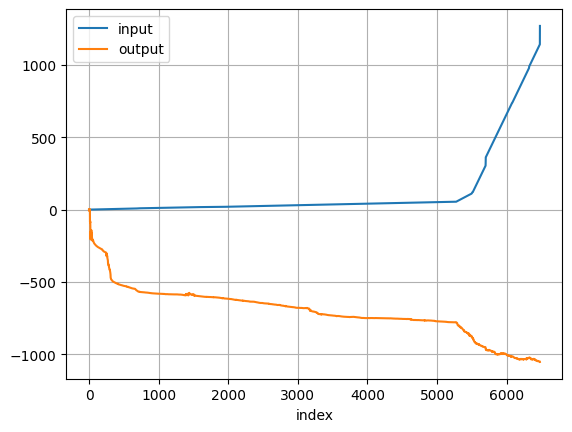

In [3]:
axe = data.plot()
axe.grid()

<AxesSubplot:xlabel='input'>

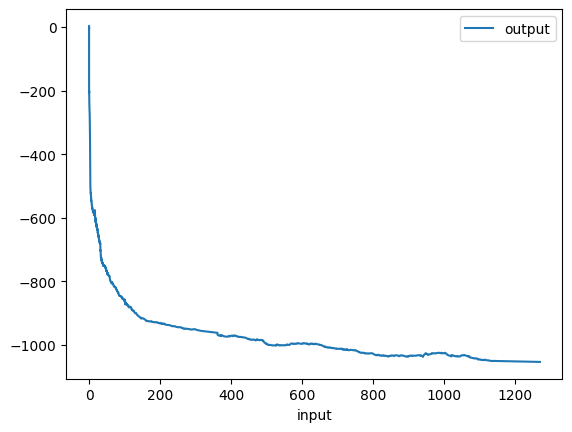

In [4]:
data.plot(x="input", y="output")

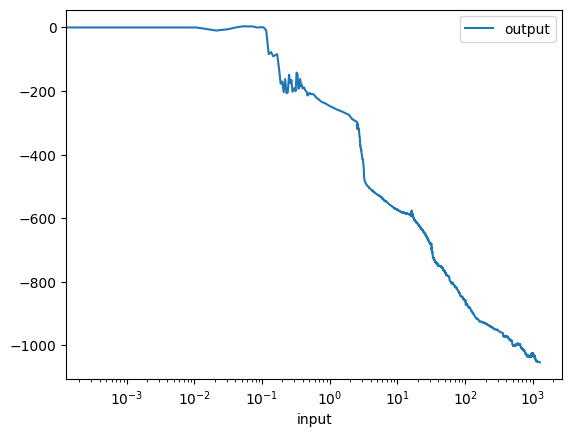

In [5]:
axe = data.plot(x="input", y="output")
axe.set_xscale("log")

In [6]:
data["d1in"] = signal.savgol_filter(data["input"], 60, 1, deriv=1)
data["d2in"] = signal.savgol_filter(data["input"], 60, 2, deriv=2)
data["d1out"] = signal.savgol_filter(data["output"], 60, 1, deriv=1)
data = data.set_index("input", drop=False)

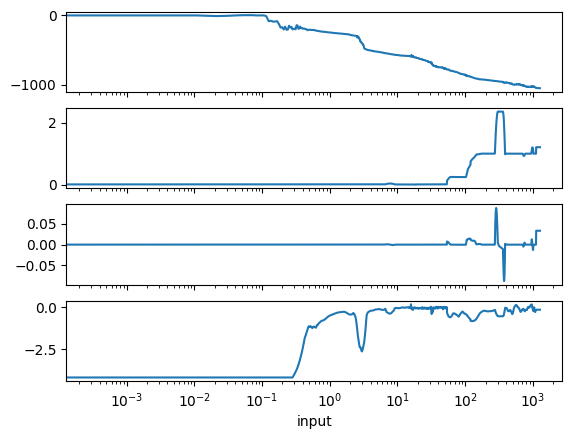

In [7]:
fig, axes = plt.subplots(4, 1, sharex=True)
data["output"].plot(ax=axes[0])
data["d1in"].plot(ax=axes[1])
data["d2in"].plot(ax=axes[2])
data["d1out"].plot(ax=axes[3])
axes[0].set_xscale("log")

In [8]:
data["stable"] = data["d2in"].abs() < 5e-5

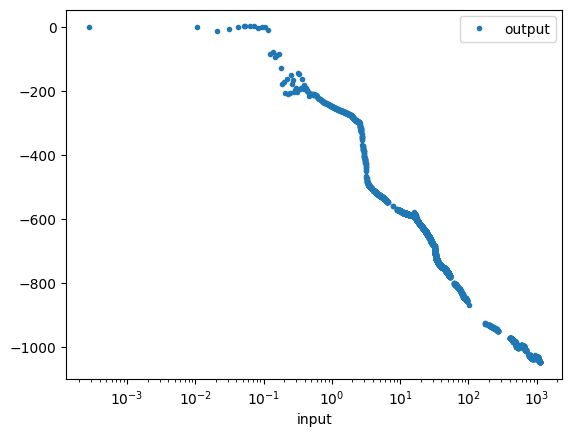

In [9]:
axe = data.query("stable").plot(x="input", y="output", marker=".", linestyle="none")
axe.set_xscale("log")

In [10]:
data["login"] = data["input"].apply(np.log10)
data

,input,output,d1in,d2in,d1out,stable,login
input,,,,,,,
0.000000,0.000000,0.000000,0.010290,0.000017,-4.178038,True,-inf
0.000278,0.000278,-0.038459,0.010290,0.000017,-4.178038,True,-3.556303
0.010694,0.010694,-0.038459,0.010290,0.000017,-4.178038,True,-1.970842
0.021111,0.021111,-9.649894,0.010290,0.000017,-4.178038,True,-1.675489
0.031528,0.031528,-5.457911,0.010290,0.000017,-4.178038,True,-1.501307
...,...,...,...,...,...,...,...
1139.489861,1139.489861,-1050.348142,1.207275,0.033431,-0.153113,False,3.056710
1140.489861,1140.489861,-1049.790493,1.207275,0.033431,-0.153113,False,3.057091
1141.489861,1141.489861,-1050.104571,1.207275,0.033431,-0.153113,False,3.057472


<AxesSubplot:xlabel='input'>

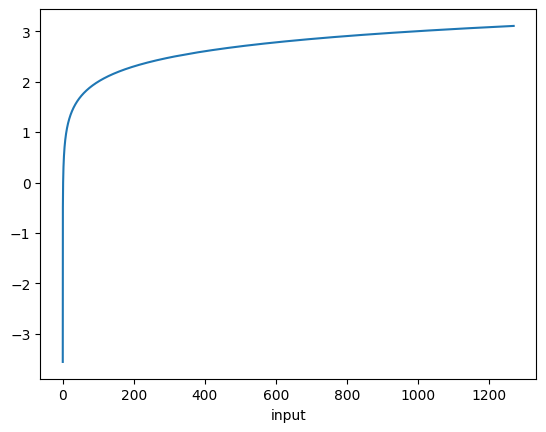

In [11]:
data["login"].plot()

In [12]:
data = data.loc[1:,:]

In [13]:
#data = data.set_index("login")

In [14]:
def rolling_pipe(dataframe, window, fctn):
    return pd.Series([
        dataframe.iloc[i-window: i].pipe(fctn) 
            if i >= window else None 
            for i in range(1, len(dataframe)+1)],
            index = dataframe.index)

In [15]:
def f(x):
    return np.linalg.lstsq(x["login"].values.reshape(-1, 1), x["output"].values, rcond=None)[0][0]

In [26]:
def f(x):
    return np.polyfit(x["login"].values, x["output"].values, 1)[0]

<AxesSubplot:xlabel='input'>

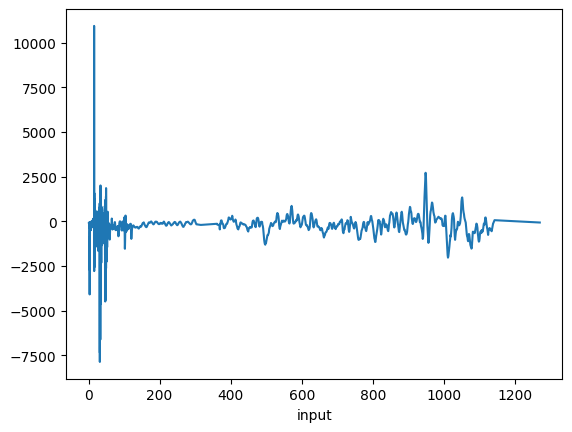

In [31]:
data.pipe(rolling_pipe, 10, f).plot()

In [23]:
x = np.linspace(0, 1, 100)
y = 3*x + 2

In [25]:
np.polyfit(x, y, 1)

array([3., 2.])